In [73]:
#yahoo finance as data source
#pip install yfinance
import yfinance as yf

In [114]:
#See the yahoo finance ticker for your stock symbol
stock_symbol = 'MRF.NS'

In [115]:
#last 5 years data with interval of 1 day
data = yf.download(tickers=stock_symbol,period='5y',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [76]:
type(data)

pandas.core.frame.DataFrame

In [78]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-23,5.76,5.89,5.71,5.83,5.449783,131200
2018-04-24,5.89,6.19,5.77,6.13,5.730217,257000
2018-04-25,6.17,6.17,5.85,5.99,5.599348,165900
2018-04-26,6.00,6.24,5.94,6.17,5.767609,146300
2018-04-27,6.20,6.34,6.05,6.33,5.917174,121800


In [6]:
len(data)

1235

In [7]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-17,108.150002,110.599998,107.550003,110.099998,110.099998,11580594
2023-04-18,109.300003,110.599998,109.050003,109.500000,109.500000,9664860
2023-04-19,109.000000,109.949997,107.699997,108.250000,108.250000,8205988
2023-04-20,109.000000,109.449997,108.250000,108.699997,108.699997,12345494
2023-04-21,108.599998,109.199997,107.849998,108.349998,108.349998,5402376


In [116]:
opn = data[['Open']]

<Axes: xlabel='Date'>

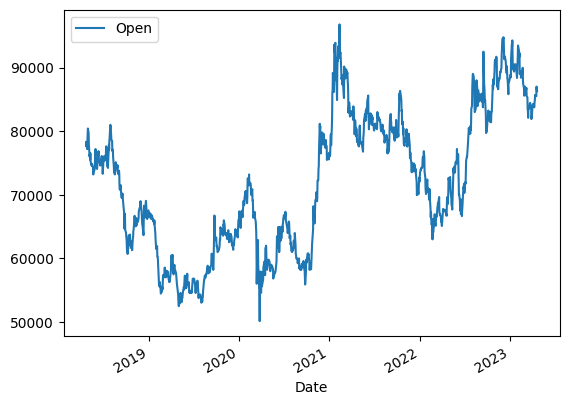

In [117]:
opn.plot()

In [10]:
import matplotlib.pyplot as plt

In [118]:
ds = opn.values

In [12]:
ds

array([[110.90000153],
       [111.33333588],
       [112.80000305],
       ...,
       [109.        ],
       [109.        ],
       [108.59999847]])

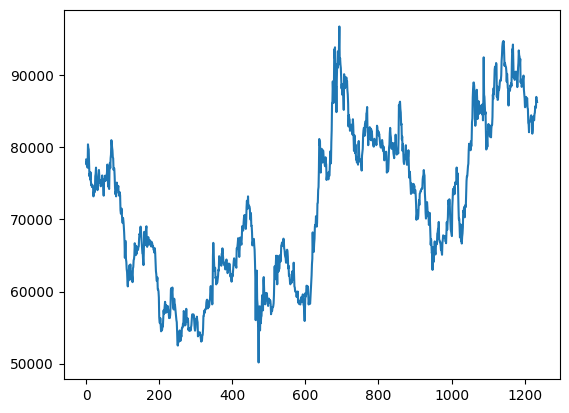

In [119]:
plt.plot(ds)

In [14]:
import numpy as np

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [120]:
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [121]:
len(ds_scaled), len(ds)

(1235, 1235)

In [122]:
#Defining test and train data sizes
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size

In [19]:
train_size,test_size

(864, 371)

In [123]:
#Splitting data between train and test
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]

In [83]:
len(ds_train),len(ds_test)

(864, 371)

In [124]:
#creating dataset in time series for LSTM model 
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [126]:
#Taking 100 days price as one record for training
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [127]:
X_train.shape,y_train.shape

((763, 100), (763,))

In [128]:
X_test.shape, y_test.shape

((270, 100), (270,))

In [129]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [130]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [131]:
#Creating LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
#Training model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
12/12 [==============================] - 24s 780ms/step - loss: 0.1530 - val_loss: 0.0186
Epoch 2/100
12/12 [==============================] - 4s 352ms/step - loss: 0.0191 - val_loss: 0.0043
Epoch 3/100
12/12 [==============================] - 4s 359ms/step - loss: 0.0110 - val_loss: 0.0056
Epoch 4/100
12/12 [==============================] - 5s 418ms/step - loss: 0.0076 - val_loss: 0.0039
Epoch 5/100
12/12 [==============================] - 5s 388ms/step - loss: 0.0056 - val_loss: 0.0029
Epoch 6/100
12/12 [==============================] - 5s 400ms/step - loss: 0.0051 - val_loss: 0.0028
Epoch 7/100
12/12 [==============================] - 5s 382ms/step - loss: 0.0050 - val_loss: 0.0027
Epoch 8/100
12/12 [==============================] - 5s 388ms/step - loss: 0.0048 - val_loss: 0.0027
Epoch 9/100
12/12 [==============================] - 4s 345ms/step - loss: 0.0047 - val_loss: 0.0026
Epoch 10/100
12/12 [==============================] - 4s 351ms/step - loss: 0.0045 - val_l

12/12 [==============================] - 4s 350ms/step - loss: 0.0015 - val_loss: 7.8985e-04
Epoch 81/100
12/12 [==============================] - 4s 347ms/step - loss: 0.0013 - val_loss: 9.5111e-04
Epoch 82/100
12/12 [==============================] - 4s 358ms/step - loss: 0.0015 - val_loss: 7.7989e-04
Epoch 83/100
12/12 [==============================] - 5s 401ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 84/100
12/12 [==============================] - 4s 370ms/step - loss: 0.0012 - val_loss: 7.5743e-04
Epoch 85/100
12/12 [==============================] - 4s 328ms/step - loss: 0.0013 - val_loss: 6.5243e-04
Epoch 86/100
12/12 [==============================] - 4s 342ms/step - loss: 0.0012 - val_loss: 6.6429e-04
Epoch 87/100
12/12 [==============================] - 4s 343ms/step - loss: 0.0012 - val_loss: 7.3113e-04
Epoch 88/100
12/12 [==============================] - 4s 360ms/step - loss: 0.0011 - val_loss: 6.1372e-04
Epoch 89/100
12/12 [==============================] - 5s 386ms/

In [137]:
#PLotting loss, it shows that loss has decreased significantly and model trained well
loss = model.history.history['loss']
plt.plot(loss)

KeyError: 'loss'

In [135]:
#Predicitng on train and test data
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

9/9 [==============================] - 0s 26ms/step


In [138]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

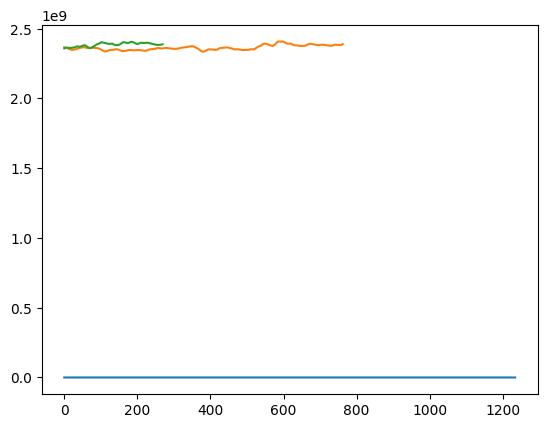

In [139]:
#Comparing using visuals
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(train_predict)
plt.plot(test_predict)

In [140]:
type(train_predict)

numpy.ndarray

In [141]:
test = np.vstack((train_predict,test_predict))

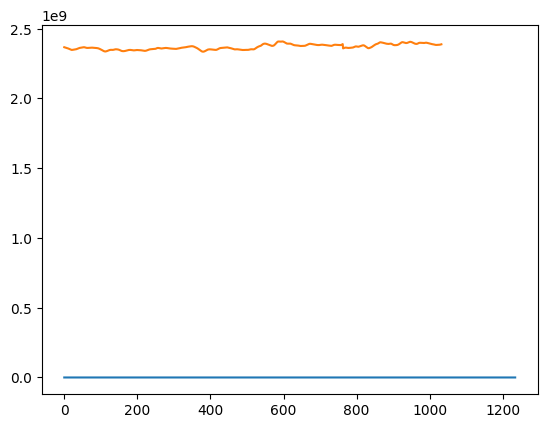

In [142]:
#Combining the predited data to create uniform data visualization
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [98]:
len(ds_test)

371

In [146]:
#Getting the last 100 days records
fut_inp = ds_test[len(ds_test)-100:]

In [147]:
fut_inp = fut_inp.reshape(1,-1)

In [148]:
tmp_inp = list(fut_inp)

In [149]:
fut_inp.shape

(1, 100)

In [150]:
#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

In [151]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.02379639632999897], [0.02311653085052967], [0.021229423582553864], [0.018284766003489494], [0.014577937312424183], [0.010446225292980671], [0.0062040588818490505], [0.0021091962698847055], [-0.0016493237344548106], [-0.004949425347149372], [-0.007726995274424553], [-0.009963855147361755], [-0.011675449088215828], [-0.012899890542030334], [-0.013688863255083561], [-0.014100629836320877], [-0.014194956980645657], [-0.014029569923877716], [-0.013657982461154461], [-0.013128264807164669], [-0.0124824745580554], [-0.01175661664456129], [-0.010980903171002865], [-0.010180164128541946], [-0.009374435991048813], [-0.008579513989388943], [-0.007807530928403139], [-0.0070675089955329895], [-0.006365874782204628], [-0.005706880707293749]]


In [152]:
len(ds_scaled)

1235

In [153]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

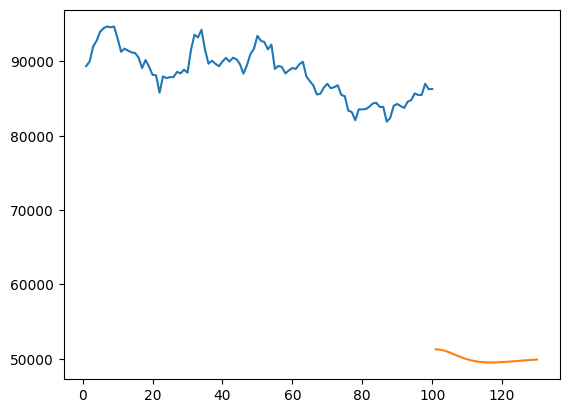

In [154]:
plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[len(ds_scaled)-100:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [155]:
ds_new = ds_scaled.tolist()

In [156]:
len(ds_new)

1235

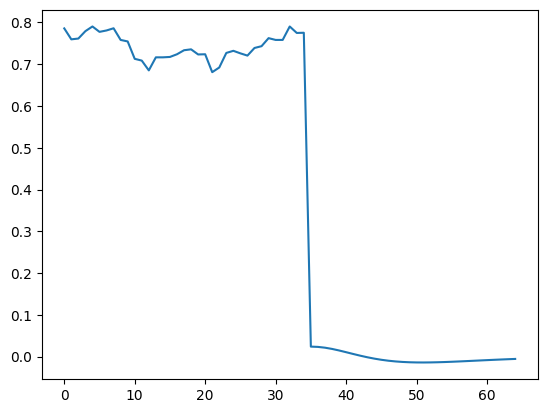

In [157]:
#Entends helps us to fill the missing value with approx value
ds_new.extend(lst_output)
plt.plot(ds_new[1200:])

In [158]:
#Creating final data for plotting
final_graph = normalizer.inverse_transform(ds_new).tolist()

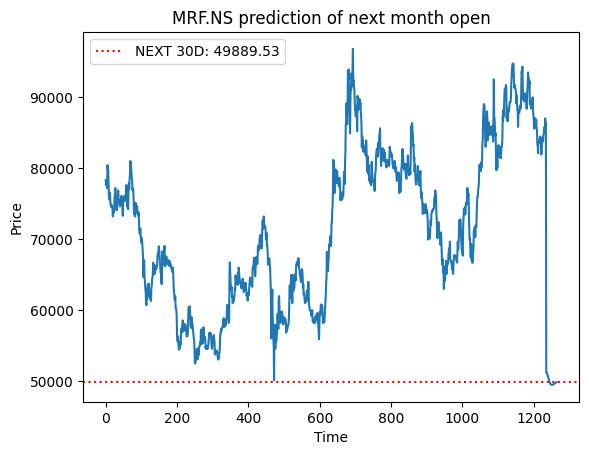

In [159]:
#Plotting final results with predicted value after 30 Days
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.title("{0} prediction of next month open".format(stock_symbol))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()

